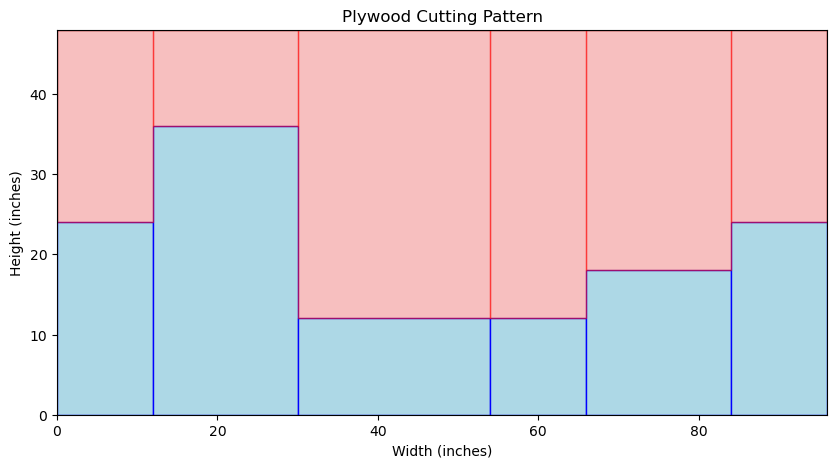

In [3]:
# Jupyter Notebook for Plywood Cutting and Plotting

# This notebook demonstrates how to calculate and visualize plywood cutting patterns to minimize waste. This is a common problem in woodworking and fabrication. Python and the `matplotlib` library are used for visualization.

# Note: Perfectly optimizing cutting patterns (especially for 2D shapes on a sheet) is a complex problem, often referred to as the 2D Bin Packing or Cutting Stock Problem. This code will provide a basic visualization and calculation, but for complex real-world optimization, you might need to explore specialized libraries or algorithms.


# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Use the following magic command to enable interactive plots in Jupyter Notebook
# %matplotlib notebook
# Or use inline for static plots
%matplotlib inline

# --- Define Plywood and Piece Dimensions ---

# Plywood sheet dimensions (replace with your values)
plywood_width = 96  # inches
plywood_height = 48 # inches

# List of desired pieces to cut (list of tuples: [(width, height), (width, height), ...])
pieces_to_cut = [(12, 24), (18, 36), (24, 12), (12, 12), (18, 18), (12, 24)]

# --- Simple Cutting Algorithm (First-Fit Approach) ---

# This is a basic algorithm; for complex scenarios, consider optimization libraries
# (e.g., genetic algorithms, dynamic programming)

cut_patterns = []  # To store the calculated cut patterns
remaining_plywood = [(0, 0, plywood_width, plywood_height)] # Start with a single full sheet

for piece_width, piece_height in pieces_to_cut:
    placed = False
    for i, (x, y, w, h) in enumerate(remaining_plywood):
        if piece_width <= w and piece_height <= h:
            # Place the piece
            cut_patterns.append({'piece': (piece_width, piece_height), 'position': (x, y)})

            # Update remaining plywood (split the area)
            new_remaining = []

            # Split horizontally (if there's space to the right)
            if w - piece_width > 0:
                new_remaining.append((x + piece_width, y, w - piece_width, h))

            # Split vertically (if there's space below the placed piece)
            if h - piece_height > 0:
                new_remaining.append((x, y + piece_height, piece_width, h - piece_height))

            # Add any untouched remaining areas from the original rectangle
            for j, (ox, oy, ow, oh) in enumerate(remaining_plywood):
                if i != j:
                    new_remaining.append((ox, oy, ow, oh))

            remaining_plywood = new_remaining
            placed = True
            break # Move to the next piece to cut

    if not placed:
        print(f"Could not place piece: ({piece_width}, {piece_height}). Consider using more sheets or a better optimization algorithm.")


# --- Plotting the Cut Patterns ---

fig, ax = plt.subplots(1) # Create a figure and axis for plotting

# Set the figure size for better visualization (adjust as needed)
fig.set_size_inches(10, 5)

# Plot the plywood sheet boundary
rect_plywood = patches.Rectangle((0, 0), plywood_width, plywood_height, linewidth=1, edgecolor='black', facecolor='none')
ax.add_patch(rect_plywood)

# Plot the individual cut pieces
for pattern in cut_patterns:
    piece_width, piece_height = pattern['piece']
    x, y = pattern['position']
    rect_piece = patches.Rectangle((x, y), piece_width, piece_height, linewidth=1, edgecolor='blue', facecolor='lightblue')
    ax.add_patch(rect_piece)

# Plot the remaining waste areas
for x, y, w, h in remaining_plywood:
    rect_waste = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='red', facecolor='lightcoral', alpha=0.5)
    ax.add_patch(rect_waste)

# Set axis limits
ax.set_xlim(0, plywood_width)
ax.set_ylim(0, plywood_height)

# Set labels for axes
ax.set_xlabel('Width (inches)') #
ax.set_ylabel('Height (inches)') #

# Set plot title
ax.set_title('Plywood Cutting Pattern')

# Ensure aspect ratio is equal for a proper visualization
ax.set_aspect('equal', adjustable='box')

plt.show()
